In [128]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, Lasso, ElasticNetCV
from sklearn.svm import LinearSVR
from src.data import make_dataset
from src.features import build_features,build_targets
from src.models import predict_model, train_model, split_data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
seed=42

In [3]:
# Load data
molecules=make_dataset.load()

In [131]:
# Build the features
X=build_features.build(molecules,fpSize=512)

mean value of features = 0.149053955078125


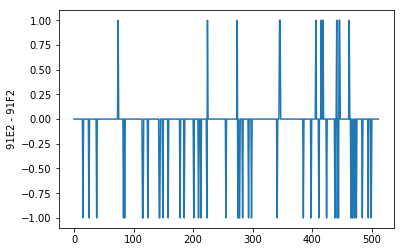

Different at 53/512


In [149]:
# Plot one of the feature vectors
m1=[i for i in range(len(molecules)) if molecules[i].GetProp("NAME")=='91E2']
m1=m1[0]
m2=[i for i in range(len(molecules)) if molecules[i].GetProp("NAME")=='91F2']
m2=m2[0]
plt.plot(X[m1]-X[m2])
plt.ylabel("%s - %s"%(molecules[m1].GetProp("NAME"),molecules[m2].GetProp("NAME")))
plt.show()
print("Different at %d/%d"%(sum(X[m1]!=X[m2]),len(X[m1])))

In [74]:
# Build the targets
keep=['H960-003','Amb-751']
(y,aptamers)=build_targets.build_fold(molecules,keep)

Column names are Target, H960-266, H960-319, H960-850, H960-892, H960-735, H960-425, H960-940, H960-613, H960-251, H960-003, H960-875, H960-650, H960-172, H960-186, H960-050, H960-594, H960-228, H960-316, H960-488, H960-629, H960-668, H960-5050, H960-561, H960-156, H960-922, H960-843, H960-616, H960-617, H960-505, H960-072, H960-724, H960-315, H960-939, H960-256, H960-920, H960-869, H960-356, H960-337, H960-540, NSRef-630, NS-404, NS-231, NS-160, Amb-767, Amb-563, Amb-113, Amb-751, Amb-816, Amb-720, Amb-318, Amb-6319
Processed 101 targets.
['1A4', '1C5', '1C7', '1F7', '101B7', '101C7', '101D11', '101D7', '101D9', '101E10', '101E6', '101F11', '101F2', '101F7', '101G6', '101H6', '111E3', '111H2', '111H7', '11D3', '21G8', '31B11', '31B9', '31C10', '31C2', '31C3', '31C8', '31D4', '31D7', '31D8', '31E10', '31E3', '31E4', '31E7', '31E9', '31F10', '31H10', '41A11', '41C4', '41C5', '41C7', '41D10', '41D4', '41D7', '41E10', '41E2', '41E3', '41E4', '41E7', '41E9', '41F10', '41F2', '41F3', '41F4'

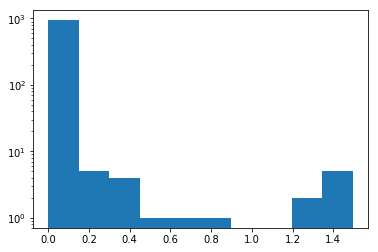

In [49]:
# Plot the target distribution
plt.hist(y[0])
plt.yscale('log')
plt.show()

In [133]:
# Create train/test sets
X_train, X_test, y_train, y_test, ind_train, ind_test = split_data.split(0.4,X,np.transpose(y),seed)
y_test=np.transpose(y_test)
y_train=np.transpose(y_train)
mol_test=[molecules[x] for x in ind_test]
mol_train=[molecules[x] for x in ind_train]

Fraction hits: train: 0.020, test: 0.025


In [134]:
# Test models to (manually) choose best one based on cross-validation over training set
test_aptamer=1
max_features=30
train_model.cv_model(LinearRegression(), X_train, y_train[test_aptamer])
train_model.cv_model_sfm(LinearRegression(), X_train, y_train[test_aptamer],max_features=max_features)
train_model.cv_model(LinearSVR(C=.001,max_iter=10000,epsilon=0), X_train, y_train[test_aptamer])
train_model.cv_model(LassoCV(), X_train, y_train[test_aptamer])
train_model.cv_model(ElasticNetCV(), X_train, y_train[test_aptamer])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
{'fit_time': array([0.03098297, 0.02358103, 0.02237797]), 'score_time': array([0.00090814, 0.00048208, 0.00053406]), 'test_score': array([-0.03239599, -0.03056814, -0.03451219]), 'train_score': array([-1.52341090e-31, -2.31530790e-31, -2.07913424e-31])}
Cross-validation scores: test=-0.032+-0.002, train=-0.000+-0.000
features: [ 15  19  34  57  65  84  91 107 113 148 164 173 179 200 206 224 236 273
 334 337 347 356 365 396 403 424 426 440 441 506]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
{'fit_time': array([0.00093889, 0.00081897, 0.00064707]), 'score_time': array([0.00023818, 0.00022221, 0.00022912]), 'test_score': array([-0.02307886, -0.01162276, -0.01069211]), 'train_score': array([-0.0089284 , -0.01422296, -0.01454076])}
Cross-validation scores: test=-0.015+-0.006, train=-0.013+-0.003
LinearSVR(C=0.001, dual=True, epsilon=0, fit_intercept=True,
          intercept_

/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

In [123]:
# Train model using best model determined above
model=train_model.train_multi(LinearSVR(C=.000001,max_iter=10000,epsilon=0.1,random_state=seed),X_train,y_train)

------
LinearSVR(C=1e-06, dual=True, epsilon=0.1, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=42, tol=0.0001, verbose=0)
Train:
score= [0.00018951428262503622, 0.003833998742699407]
mean(score)=0.002
Test:
score= [-0.0032463853696482747, -0.007682630028783999]
mean(score)=-0.005


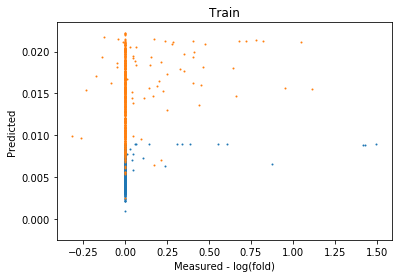

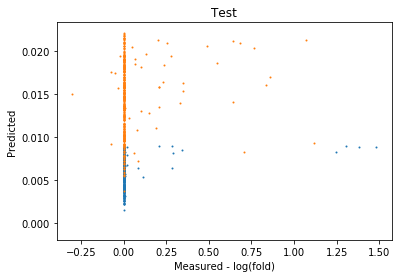

In [124]:
# Test model
print("------")
print(model[0])
print("Train:")
yp_train=predict_model.predict_reg(model,X_train,y_train,mol_train)
yp_train=np.transpose(yp_train)
print("Test:")
yp_test=predict_model.predict_reg(model,X_test,y_test,mol_test)
yp_test=np.transpose(yp_test)

for i in range(len(y_train)):
    plt.scatter(y_train[i] ,yp_train[i],label="Train",s=1)
ax=plt.gca()
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel("Measured - log(fold)")
plt.ylabel("Predicted")
plt.title("Train")
plt.show()

for i in range(len(y_test)):
    plt.scatter(y_test[i],yp_test[i] ,label="Test",s=1)
ax=plt.gca()
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel("Measured - log(fold)")
plt.ylabel("Predicted")
plt.title("Test")
plt.show()
